In [3]:
import os , glob 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import skimage
from skimage.io import imread , imread_collection 

from sklearn.metrics import accuracy_score , classification_report
from sklearn.preprocessing import LabelEncoder,StandardScaler

import keras
from keras.applications import mobilenet
from keras.layers import Dense ,Dropout
from keras.models import Sequential

Using TensorFlow backend.


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:
#from google.colab import drive
#drive.mount('/content/drive')

In [6]:
os.chdir('C:\\Users\\Indiaka.TORRE-DAVID\\Desktop\Datos')

In [7]:
os.getcwd()

'C:\\Users\\Indiaka.TORRE-DAVID\\Desktop\\Datos'

In [10]:
image_pathes ='C:\\Users\\Indiaka.TORRE-DAVID\\Desktop\Datos\\cancer2\\*/'
#image_pathes ='../cancer/cancer/*/'

patient_list = list(glob.glob(image_pathes))
print('Number of the patient :'+' '+str(len(patient_list)))


Number of the patient : 5


In [11]:
sum = 0
for i in range(0 , len(patient_list)):
    sum+=len(glob.glob(patient_list[i]+'/*/*'))
print(sum)

2772


In [12]:
test=[glob.glob(patient_list[i]+'/*/*') for i in range(0,len(patient_list))]

In [18]:
test[0][0]

'C:\\Users\\Indiaka.TORRE-DAVID\\Desktop\\Datos\\cancer2\\10253\\0\\10253_idx5_x1001_y1001_class0.png'

**Visualizacion de un ejemplo de nuestro dataset**

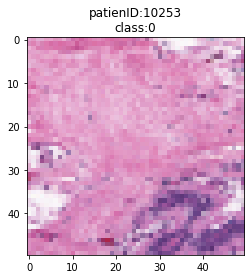

In [19]:
img_sample = imread(test[0][0])
plt.title('patienID:'
          +str(test[0][0].split('\\')[6])+'\n'
         'class:'+str(test[0][0].split('\\')[7]))
plt.imshow(img_sample)

**Crear un DataFrame para nuestro dataset**

In [20]:
patient_ID = [test[i][x].split('\\')[6]for i in range(0,len(test))for x in range(0,len(test[i]))]
class_test = [test[i][x].split('\\')[7]for i in range(0,len(test))for x in range(0 ,len(test[i]))]
patient_pathes = [test[i][x]for i in range(0,len(test))for x in range(0,len(test[i]))]

In [21]:
d = {'patient_ID':patient_ID,'pathes':patient_pathes,'diagnosis':class_test}
BC_df = pd.DataFrame(data=d)

In [22]:
print('The shape of our datset:'+" "+str(BC_df.shape))
BC_df.head()

The shape of our datset: (2772, 3)


,patient_ID,pathes,diagnosis
0,10253,C:\Users\Indiaka.TORRE-DAVID\Desktop\Datos\can...,0
1,10253,C:\Users\Indiaka.TORRE-DAVID\Desktop\Datos\can...,0
2,10253,C:\Users\Indiaka.TORRE-DAVID\Desktop\Datos\can...,0
3,10253,C:\Users\Indiaka.TORRE-DAVID\Desktop\Datos\can...,0
4,10253,C:\Users\Indiaka.TORRE-DAVID\Desktop\Datos\can...,0


In [23]:
BC_df = BC_df[(BC_df['diagnosis']=='0')|(BC_df['diagnosis']=='1')]  

In [24]:
os.getcwd()

'C:\\Users\\Indiaka.TORRE-DAVID\\Desktop\\Datos'

In [25]:
BC_df.to_csv('Breat_cancer_data.csv')

In [26]:
print('The shape of new edited BC_df csv :'+' '+str(BC_df.shape))

The shape of new edited BC_df csv : (2772, 3)


In [27]:
BC_df['diagnosis'].value_counts()

0    2210
1     562
Name: diagnosis, dtype: int64

 para la memoria: https://www.aprendemachinelearning.com/clasificacion-con-datos-desbalanceados/